In [1]:
import import_ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
start = '2010-01-01'
end = '2022-05-01'

df = data.DataReader('GOOGL','yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,313.013000,310.300293,312.687683,310.300293,2437160.0,310.300293
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908488.0,313.688690
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003391.0,312.307312
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949443.0,304.434448
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815771.0,297.347351


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-25,2465.550049,2370.219971,2382.020020,2461.479980,2306400.0,2461.479980
2022-04-26,2450.199951,2370.219971,2445.889893,2373.000000,3652700.0,2373.000000
2022-04-27,2344.840088,2254.729980,2289.389893,2285.889893,4591000.0,2285.889893
2022-04-28,2392.989990,2282.300049,2328.300049,2370.449951,2444200.0,2370.449951
2022-04-29,2358.399902,2276.290039,2334.689941,2282.189941,2131800.0,2282.189941


In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,313.013000,310.300293,312.687683,310.300293,2437160.0,310.300293
1,2010-01-04,315.070068,312.432434,313.788788,313.688690,3908488.0,313.688690
2,2010-01-05,314.234222,311.081085,313.903900,312.307312,6003391.0,312.307312
3,2010-01-06,313.243256,303.483490,313.243256,304.434448,7949443.0,304.434448
4,2010-01-07,305.305298,296.621613,305.005005,297.347351,12815771.0,297.347351


In [7]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,313.013000,310.300293,312.687683,310.300293,2437160.0
1,315.070068,312.432434,313.788788,313.688690,3908488.0
2,314.234222,311.081085,313.903900,312.307312,6003391.0
3,313.243256,303.483490,313.243256,304.434448,7949443.0
4,305.305298,296.621613,305.005005,297.347351,12815771.0


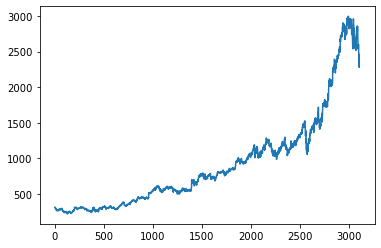

In [8]:
plt.plot(df.Close)

In [14]:
df

,High,Low,Open,Close,Volume
0,313.013000,310.300293,312.687683,310.300293,2437160.0
1,315.070068,312.432434,313.788788,313.688690,3908488.0
2,314.234222,311.081085,313.903900,312.307312,6003391.0
3,313.243256,303.483490,313.243256,304.434448,7949443.0
4,305.305298,296.621613,305.005005,297.347351,12815771.0
...,...,...,...,...,...
2512,1352.010010,1344.170044,1350.209961,1344.430054,673400.0
2513,1363.199951,1345.510010,1346.550049,1362.469971,1183100.0
2514,1367.050049,1353.000000,1364.000000,1354.640015,1160600.0
2515,1357.000000,1337.839966,1356.810059,1339.709961,999700.0


In [15]:
ma100 = df.Close.rolling(100).mean()
ma100


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2512    1251.977195
2513    1254.054395
2514    1255.889995
2515    1257.527994
2516    1258.859995
Name: Close, Length: 2517, dtype: float64

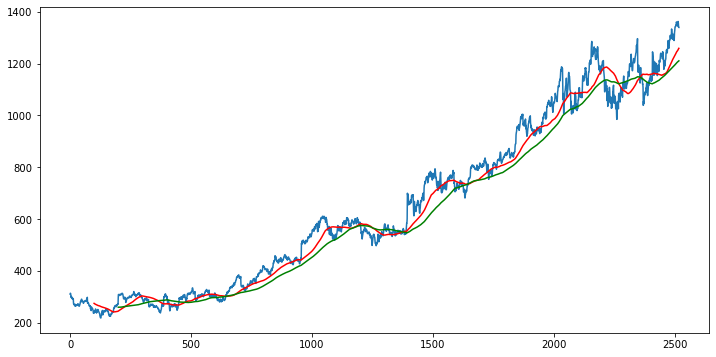

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [18]:
ma200 = df.Close.rolling(200).mean()

In [19]:
# Splitting Data into Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [20]:
data_training.head()
#data_testing.head()

,Close
0,310.300293
1,313.688690
2,312.307312
3,304.434448
4,297.347351


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]): 
               x_train.append(data_training_array[i-100:i])
               y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
#ML Model
x_train.shape

(1661, 100, 1)

In [26]:
import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 49s 401ms/step - loss: 0.0642
Epoch 2/50
52/52 [==============================] - 18s 353ms/step - loss: 0.0101
Epoch 3/50
52/52 [==============================] - 18s 352ms/step - loss: 0.0094
Epoch 4/50
52/52 [==============================] - 17s 334ms/step - loss: 0.0079
Epoch 5/50
52/52 [==============================] - 18s 347ms/step - loss: 0.0086
Epoch 6/50
52/52 [==============================] - 18s 344ms/step - loss: 0.0078
Epoch 7/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0079
Epoch 8/50
52/52 [==============================] - 19s 369ms/step - loss: 0.0068
Epoch 9/50
52/52 [==============================] - 19s 362ms/step - loss: 0.0066
Epoch 10/50
52/52 [==============================] - 17s 332ms/step - loss: 0.0066
Epoch 11/50
52/52 [==============================] - 20s 385ms/step - loss: 0.0062
Epoch 12/50
52/52 [==============================] - 19s 367ms/step - loss: 0.0061
Epoch 13/50
5

In [30]:
model.save('keras_model.h5')

In [31]:
past_100_days=data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [33]:
final_df.head()


,Close
0,805.229980
1,807.479980
2,808.489990
3,808.200012
4,807.049988


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08536727],
       [0.08906034],
       [0.09071813],
       [0.09024217],
       [0.08835456],
       [0.08656553],
       [0.0787362 ],
       [0.08567913],
       [0.08129672],
       [0.07620854],
       [0.07177684],
       [0.07118598],
       [0.06627822],
       [0.06250311],
       [0.06565449],
       [0.0699221 ],
       [0.06352074],
       [0.06012311],
       [0.0626673 ],
       [0.07164551],
       [0.08994674],
       [0.08989745],
       [0.08144449],
       [0.05787445],
       [0.07484618],
       [0.05826836],
       [0.06112442],
       [0.07880182],
       [0.07345096],
       [0.06921632],
       [0.07642193],
       [0.08503908],
       [0.10296273],
       [0.10133779],
       [0.08113263],
       [0.09439476],
       [0.09329508],
       [0.0811162 ],
       [0.0834469 ],
       [0.0774067 ],
       [0.08136234],
       [0.07880182],
       [0.0818384 ],
       [0.07794838],
       [0.10004105],
       [0.09249083],
       [0.09610184],
       [0.083

In [35]:
input_data.shape

(856, 1)

In [36]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]): 
               x_test.append(input_data[i-100:i])
               y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [37]:
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [38]:
# Making Predictions

y_predicted = model.predict(x_test)

In [39]:
y_predicted.shape

(756, 1)

In [40]:
y_test

array([0.08151011, 0.06439071, 0.08993031, 0.0895364 , 0.09815355,
       0.11816176, 0.12139519, 0.11947483, 0.12579403, 0.12525246,
       0.12756673, 0.12185482, 0.12441534, 0.11678297, 0.12302013,
       0.14970869, 0.1580797 , 0.17272063, 0.17030777, 0.15069357,
       0.11589667, 0.10992209, 0.10179732, 0.10675427, 0.10982361,
       0.11226922, 0.12475997, 0.12582689, 0.12612233, 0.13398442,
       0.14073049, 0.14248676, 0.13803863, 0.1459992 , 0.15318837,
       0.15765293, 0.16108332, 0.16049246, 0.15525651, 0.15830942,
       0.15052938, 0.16993029, 0.15860485, 0.15734107, 0.15437021,
       0.1607387 , 0.16482568, 0.17171942, 0.17757899, 0.18278219,
       0.18496513, 0.18903577, 0.19167834, 0.19556836, 0.18824785,
       0.15908091, 0.1585228 , 0.14186303, 0.13446047, 0.13999186,
       0.14347154, 0.15863771, 0.15799755, 0.15524008, 0.16993029,
       0.16306941, 0.15706197, 0.15080838, 0.14588429, 0.14522781,
       0.14224052, 0.1448339 , 0.1427329 , 0.16727129, 0.16540

In [41]:
y_predicted

array([[0.12822884],
       [0.12726569],
       [0.12562263],
       [0.12364082],
       [0.12170364],
       [0.12017128],
       [0.11947723],
       [0.11991362],
       [0.12145853],
       [0.12401423],
       [0.12734203],
       [0.13113588],
       [0.13501567],
       [0.1386382 ],
       [0.1416927 ],
       [0.14402293],
       [0.1458471 ],
       [0.14753105],
       [0.14950947],
       [0.15206149],
       [0.15505813],
       [0.15791576],
       [0.15997425],
       [0.1607038 ],
       [0.15987542],
       [0.15759028],
       [0.15427276],
       [0.15057397],
       [0.14711264],
       [0.14432037],
       [0.14252856],
       [0.14193666],
       [0.14246956],
       [0.14394929],
       [0.14616191],
       [0.14889672],
       [0.15197417],
       [0.15525806],
       [0.15859249],
       [0.16176435],
       [0.16460872],
       [0.16692254],
       [0.16878124],
       [0.1702174 ],
       [0.17120543],
       [0.17176121],
       [0.17199509],
       [0.172

In [42]:
scaler.scale_

array([0.00164136])

In [43]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

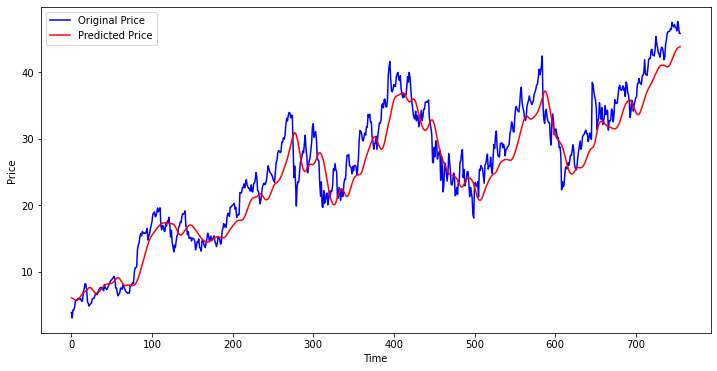

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()